In [34]:
import matplotlib.pyplot as plt 
import numpy as np 
import pandas as pd 
import seaborn as sns
import os 

from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.layers import Dense, Input, Dropout, GlobalAveragePooling2D, Flatten, Conv2D, BatchNormalization, Activation, MaxPooling2D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam, SGD, RMSprop


In [35]:
folder_path = "/kaggle/input/expression-dataset-facial/images/"
picture_size = 48 

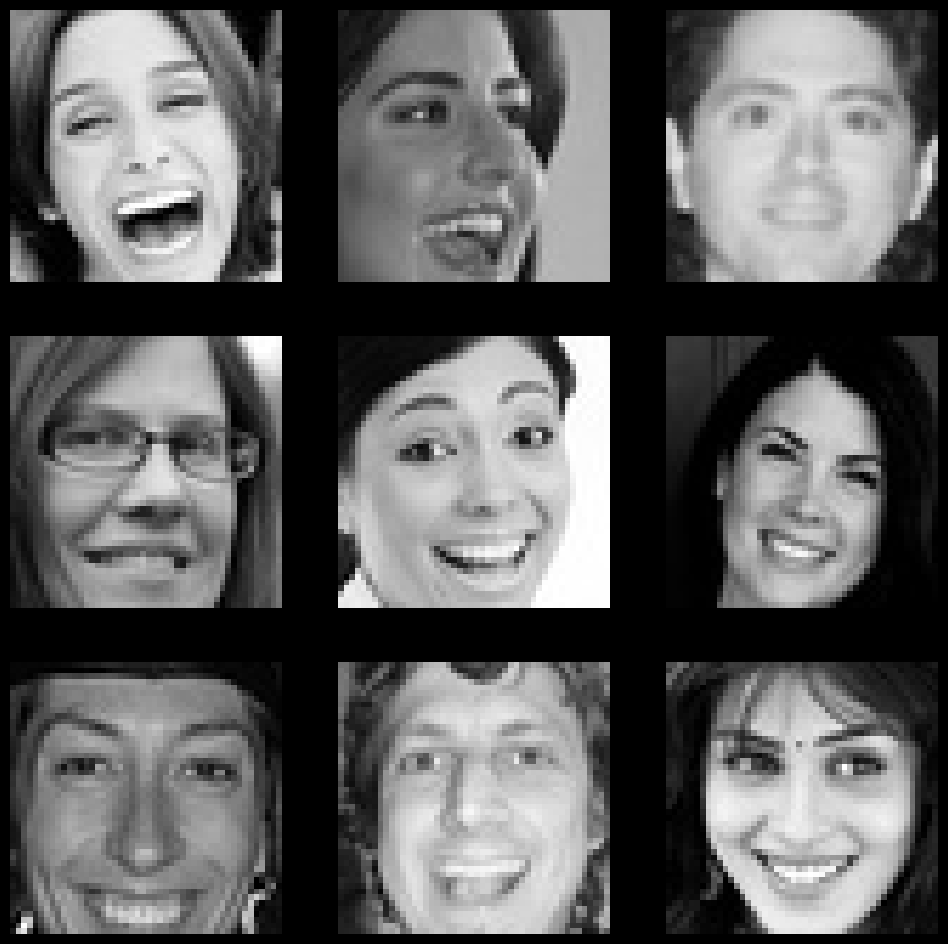

In [36]:
expression = 'happy'
plt.figure(figsize=(12,12))
plt.style.use('dark_background')

for i in range(1, 10):
    plt.subplot(3, 3, i)
    img_path = os.path.join(folder_path, "train", expression, os.listdir(os.path.join(folder_path, "train", expression))[i])
    img = load_img(img_path, target_size=(picture_size, picture_size))
    plt.imshow(img)
    plt.axis("off")

In [37]:
batch_size = 128
datagen_train = ImageDataGenerator()
datagen_val = ImageDataGenerator()
train_set = datagen_train.flow_from_directory(folder_path+'train',target_size = (picture_size,picture_size),
                                              color_mode = 'grayscale',
                                              batch_size=batch_size,
                                              class_mode='categorical',
                                              shuffle=True)

test_set = datagen_val.flow_from_directory(folder_path+'validation',
                                          target_size = (picture_size,picture_size),
                                          color_mode = 'grayscale',
                                              batch_size=batch_size,
                                              class_mode='categorical',
                                              shuffle=False)

Found 28821 images belonging to 7 classes.
Found 7066 images belonging to 7 classes.


model building

In [38]:
no_of_classes = 7
model = Sequential()
model.add(Conv2D(64,(3,3),padding = 'same',input_shape = (48,48,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(218,(5,5),padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(512,(3,3),padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(no_of_classes,activation='softmax'))
opt = Adam(learning_rate = 0.0001)
model.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['accuracy'])
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)               │ (None, 48, 48, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_15          │ (None, 48, 48, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_15 (Activation)      │ (None, 48, 48, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 24, 24, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ (None, 24, 24, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 24, 24, 218)    │       349,018 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_16          │ (None, 24, 24, 218)    │           872 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_16 (Activation)      │ (None, 24, 24, 218)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 12, 12, 218)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_16 (Dropout)            │ (None, 12, 12, 218)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 12, 12, 512)    │     1,005,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_17          │ (None, 12, 12, 512)    │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_17 (Activation)      │ (None, 12, 12, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 6, 6, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_17 (Dropout)            │ (None, 6, 6, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 18432)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 256)            │     4,718,848 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_18          │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_18 (Activation)      │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_18 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 512)            │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_19          │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 6,214,985 (23.71 MB)

 Trainable params: 6,211,861 (23.70 MB)

 Non-trainable params: 3,124 (12.20 KB)

In [39]:
from keras.callbacks import ModelCheckpoint,EarlyStopping,ReduceLROnPlateau

checkpoint = ModelCheckpoint('./model.h5',monitor='val_acc',verbose=1,save_best_only=True,mode='max')
early_stopping = EarlyStopping(monitor='val_loss',
                               min_delta=0,
                               patience=3,
                               verbose=1,
                               restore_best_weights=True)


reduce_learningrate = ReduceLROnPlateau(monitor='val_loss',
                                       factor=0.2,
                                       patience=3,
                                       verbose=1,
                                       min_delta=0.0001)

callbacks_list = [early_stopping,checkpoint,reduce_learningrate]
epochs = 10

In [40]:
history = model.fit(
    train_set,
    steps_per_epoch=train_set.n // train_set.batch_size,
    epochs=epochs,
    validation_data=test_set,
    validation_steps=test_set.n // test_set.batch_size,
    callbacks=callbacks_list
)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 1033s 5s/step - accuracy: 0.2370 - loss: 2.0493 - val_accuracy: 0.3712 - val_loss: 1.6370 - learning_rate: 1.0000e-04
Epoch 2/10


/usr/local/lib/python3.11/dist-packages/keras/src/callbacks/model_checkpoint.py:209: UserWarning: Can save best model only with val_acc available, skipping.
  self._save_model(epoch=epoch, batch=None, logs=logs)


  1/225 ━━━━━━━━━━━━━━━━━━━━ 15:23 4s/step - accuracy: 0.2500 - loss: 1.8626

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


225/225 ━━━━━━━━━━━━━━━━━━━━ 60s 251ms/step - accuracy: 0.2500 - loss: 1.8626 - val_accuracy: 0.3700 - val_loss: 1.6361 - learning_rate: 1.0000e-04
Epoch 3/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 1041s 5s/step - accuracy: 0.3473 - loss: 1.7197 - val_accuracy: 0.3832 - val_loss: 1.6381 - learning_rate: 1.0000e-04
Epoch 4/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 60s 251ms/step - accuracy: 0.3516 - loss: 1.6616 - val_accuracy: 0.3838 - val_loss: 1.6366 - learning_rate: 1.0000e-04
Epoch 5/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 1007s 4s/step - accuracy: 0.3927 - loss: 1.6030 - val_accuracy: 0.4138 - val_loss: 1.6003 - learning_rate: 1.0000e-04
Epoch 6/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 82s 347ms/step - accuracy: 0.4375 - loss: 1.5250 - val_accuracy: 0.4156 - val_loss: 1.5941 - learning_rate: 1.0000e-04
Epoch 7/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 1020s 5s/step - accuracy: 0.4147 - loss: 1.5248 - val_accuracy: 0.4152 - val_loss: 1.5961 - learning_rate: 1.0000e-04
Epoch 8/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 80s 339ms/step - acc

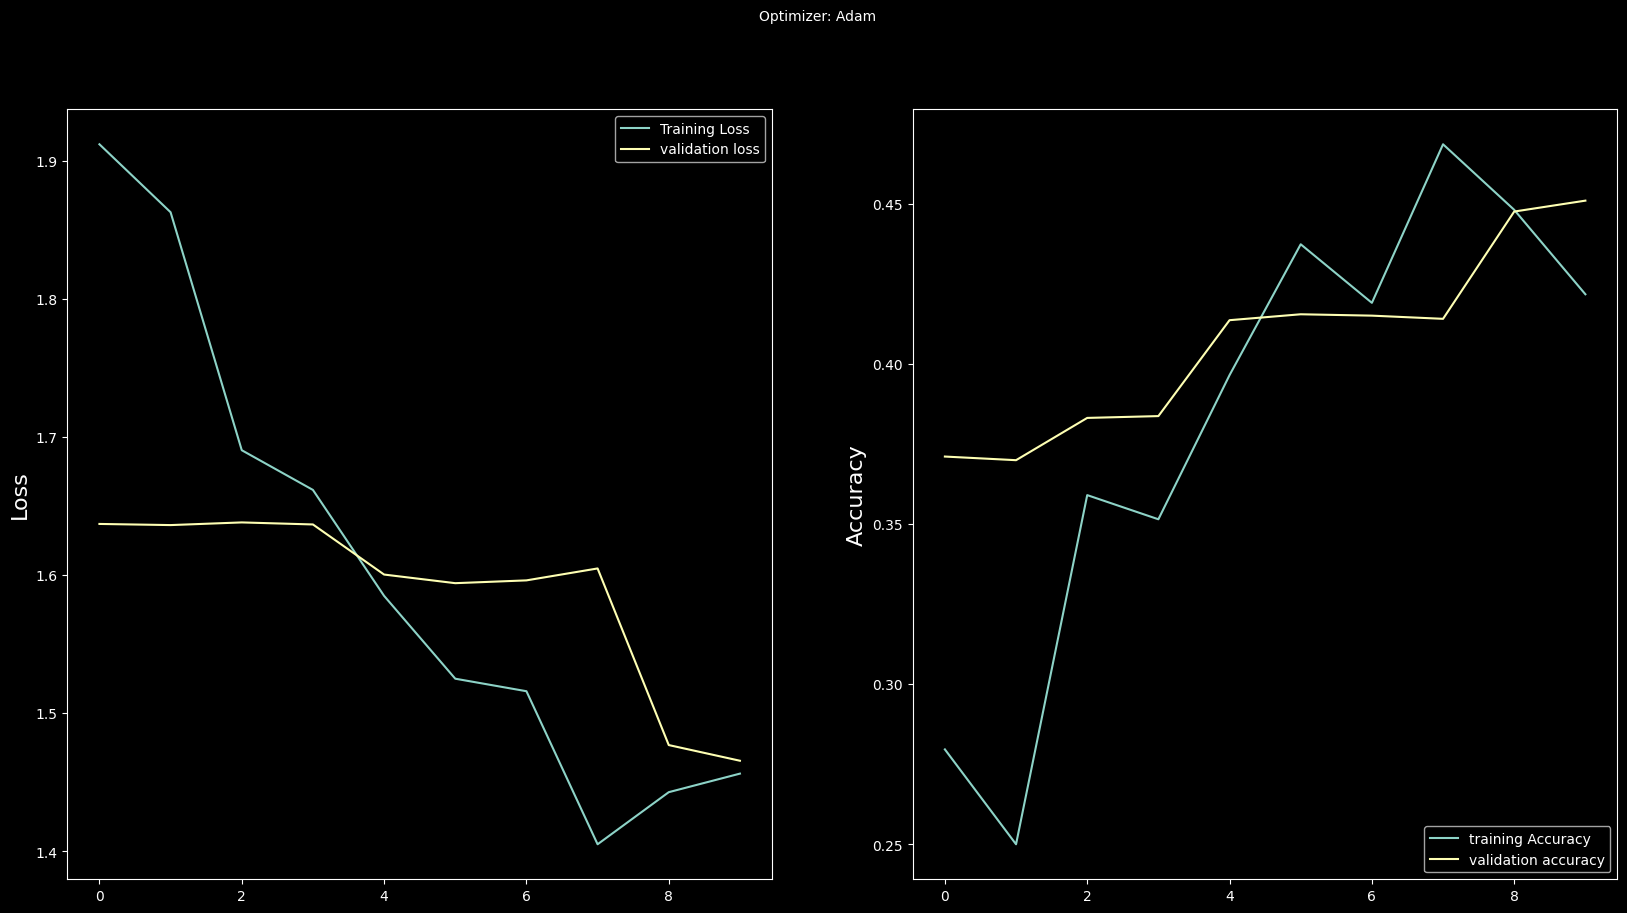

In [43]:
plt.style.use('dark_background')
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.suptitle('Optimizer: Adam',fontsize=10)
plt.ylabel('Loss',fontsize=16)
plt.plot(history.history['loss'],label='Training Loss')
plt.plot(history.history['val_loss'],label='validation loss')
plt.legend(loc = 'upper right')

plt.subplot(1,2,2)
plt.ylabel('Accuracy',fontsize=16)
plt.plot(history.history['accuracy'],label='training Accuracy')
plt.plot(history.history['val_accuracy'],label='validation accuracy')
plt.legend(loc='lower right')
plt.show()

In [44]:
model.save("/kaggle/working/model.h5")